Решить задачу Дирихле в квадрате для уравнения Пуассона

$$\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = f(x, y), 0 \leq x \leq 1, 0 \leq y \leq 1$$

$$f(x ,y) = -32(x(1 - x) + y(1 - y)), u|_{x,y \in \Gamma} = 0$$

с точностью $\epsilon = 10^{-6}$
Использовать пятиточечную аппроксимацию оператора Лапласа методом Якоби.
Исследовать зависимость числа итераций, обеспечивающих заданную точность, от количества интервалов сетки по одному направлению.

# Решение

Для решения задачи Дирихле в квадрате для уравнения Пуассона методом Якоби, нам нужно разбить область на равномерную сетку, определить значения граничных условий на границе сетки и начальные значения функции $u$ внутри сетки. Затем мы будем повторять следующий процесс до достижения необходимой точности:

$$u_{i,j}^{(k+1)} = \frac{1}{4} \left(u_{i-1,j}^{(k)} + u_{i+1,j}^{(k)} + u_{i,j-1}^{(k)} + u_{i,j+1}^{(k)} - h^2 f_{i,j}\right)$$

где $u_{i,j}$ - значение функции $u$ в узле $(i,j)$, $f_{i,j}$ - значение функции $f$ в узле $(i,j)$, $h$ - шаг сетки. Процесс продолжается до тех пор, пока максимальное изменение значений функции $u$ не станет меньше заданного значения $\varepsilon$.

Задаем начальное приближение для функции $u$ равным нулю во всех узлах внутри квадрата. Граничные условия заданы, как $u_{i,j} = 0$ для всех $i$ и $j$, находящихся на границе квадрата. Значение функции $f$ также задано в каждом узле сетки.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем параметры задачи
h = 0.05
N = int(1/h) + 1  # число узлов сетки в каждом направлении

eps = 1e-6  # требуемая точность

def f(x, y):
    return -32 * (x * (1 - x) + y * (1 - y))  # функция f(x,y)

In [2]:
# Задаем начальное приближение для функции u
u = np.zeros((N, N))

# Задаем граничные условия
u[0, :] = u[N-1, :] = u[:, 0] = u[:, N-1] = 0

# Начинаем итерационный процесс
max_err = 1  # максимальная ошибка
k = 0  # номер итерации
while max_err > eps:
    # Создаем копию текущего приближения
    u_old = u.copy()
    
    # Применяем метод Якоби
    for i in range(1, N-1):
        for j in range(1, N-1):
            u[i, j] = 0.25 * (u_old[i-1, j] + u_old[i+1, j] +
                              u_old[i, j-1] + u_old[i, j+1] - h**2 * f(i*h, j*h))
    
    # Вычисляем максимальную ошибку
    max_err = np.max(np.abs(u - u_old))
    k += 1  # увеличиваем номер итерации

# Выводим результаты
print(f'Количество итераций: {k}')
print(f'Максимальная ошибка: {max_err:.6f}')


Количество итераций: 767
Максимальная ошибка: 0.000001


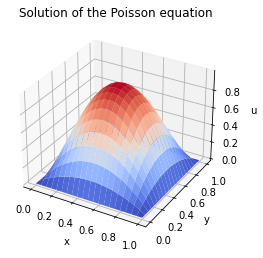

In [3]:
# Построим график решения
X, Y = np.meshgrid(np.linspace(0, 1, N), np.linspace(0, 1, N))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, u, cmap='coolwarm')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
ax.set_title('Solution of the Poisson equation')
plt.show()

# Исследуем зависимость

In [4]:
# Функция для решения задачи Дирихле в квадрате для уравнения Пуассона
def solve_poisson(N, eps):
    # Задаем параметры задачи
    h = 1 / (N - 1)  # шаг сетки
    f = lambda x, y: -32 * (x * (1 - x) + y * (1 - y))  # функция f(x,y)

    # Задаем начальное приближение для функции u
    u = np.zeros((N, N))

    # Задаем граничные условия
    u[0, :] = u[N-1, :] = u[:, 0] = u[:, N-1] = 0

    # Начинаем итерационный процесс
    max_err = 1  # максимальная ошибка
    k = 0  # номер итерации
    while max_err > eps:
        # Создаем копию текущего приближения
        u_old = u.copy()

        # Применяем метод Якоби
        for i in range(1, N-1):
            for j in range(1, N-1):
                u[i, j] = 0.25 * (u_old[i-1, j] + u_old[i+1, j] +
                                  u_old[i, j-1] + u_old[i, j+1] - h**2 * f(i*h, j*h))

        # Вычисляем максимальную ошибку
        max_err = np.max(np.abs(u - u_old))
        k += 1  # увеличиваем номер итерации

    # Возвращаем результаты
    return k

In [5]:
# Задаем диапазон значений N для исследования зависимости
N_s = np.arange(6, 32, 5)
t = len(N_s)
k_s = np.zeros(t)

for i in range(t):
    k_s[i] = solve_poisson(N_s[i], eps)

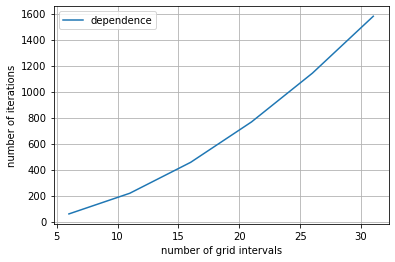

In [6]:
import matplotlib.pyplot as plt

plt.plot(N_s, k_s, label="dependence")
plt.legend()
plt.xlabel('number of grid intervals')
plt.ylabel('number of iterations')
plt.grid()
plt.show()